In [1]:
# MLP Classifier

In [2]:
# import library packages
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Given Dataset
data=pd.read_csv('Maternal_Health.csv')

In [5]:
 data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [7]:
df=data

In [8]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
Age            1014 non-null int64
SystolicBP     1014 non-null int64
DiastolicBP    1014 non-null int64
BS             1014 non-null float64
BodyTemp       1014 non-null float64
HeartRate      1014 non-null int64
RiskLevel      1014 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

var=['RiskLevel']

for i in var:
    df[i]=label.fit_transform(df[i]).astype(int)

In [11]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [12]:
# preprocessing, split test and dataset, split response variable
X=df.drop(labels='RiskLevel',axis=1)
# Response Variable
y=df.loc[:,'RiskLevel']

In [13]:
# Splitting for train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)
print('Number of training Dataset:',len(X_train))
print('Number of test dataset:',len(X_test))
print('Total Number of dataset:',len(X_train)+len(X_test))

Number of training Dataset: 709
Number of test dataset: 305
Total Number of dataset: 1014


In [14]:
# Implementing MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [15]:
mlpc=MLPClassifier()
mlpc.fit(X_train,y_train)
predicted=mlpc.predict(X_test)

In [22]:
# Finding Accuracy
accuracy=accuracy_score(y_test,predicted)
print('Accuracy of MLPClassifier',accuracy*100)
predicted_Train=mlpc.predict(X_train)
accuracy=accuracy_score(y_train,predicted_Train)
print('Training Accuracy of MLP Classifier',accuracy*100)

Accuracy of MLPClassifier 54.42622950819672
Training Accuracy of MLP Classifier 57.122708039492245


In [17]:
# Finding Classification Report
cr=classification_report(y_test,predicted)
print('Classification Report\n\n',cr)

Classification Report

               precision    recall  f1-score   support

           0       0.93      0.67      0.78        82
           1       0.69      0.20      0.31       122
           2       0.41      0.86      0.56       101

    accuracy                           0.54       305
   macro avg       0.68      0.58      0.55       305
weighted avg       0.66      0.54      0.52       305



In [20]:
# Finding Confusion Matrix
cm=confusion_matrix(y_test,predicted)
print('Confusion Matrix\n\n',cm)

Confusion Matrix

 [[55  1 26]
 [ 0 24 98]
 [ 4 10 87]]


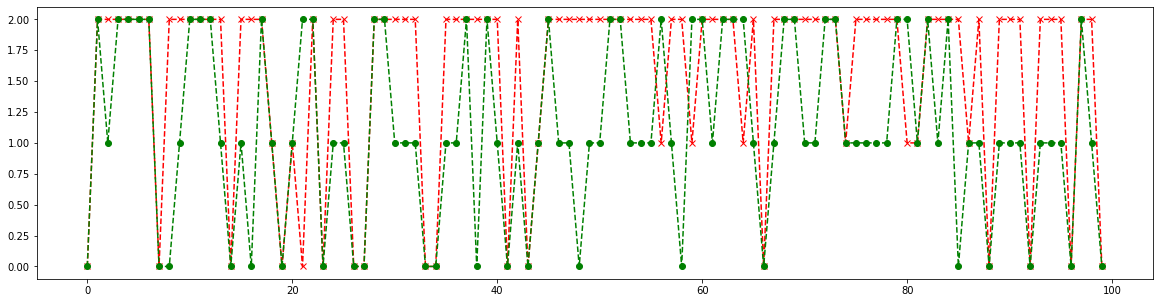

In [19]:
df2=pd.DataFrame()
df2['y_test']=y_test
df2['predicted']=predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20,5))
plt.plot(df2['predicted'][:100],marker='x',linestyle='dashed',color='red')
plt.plot(df2['y_test'][:100],marker='o',linestyle='dashed',color='green')
plt.show()